# Εργασία 10

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv( "dataset.csv")
track_names = df["track_name"]
artists = df["artists"]
df = df.drop( columns = ["Unnamed: 0", "track_id", "artists", "album_name", "track_name"] )

df.to_csv( "dataset_dropped.csv")


genres = pd.get_dummies( df['track_genre'], dtype = np.int32 )
df = df.drop( columns = ['track_genre'] )

df = ( df - df.mean() ) / df.std()

[1480325.4264540144, 1386322.9809866038, 1260633.3877016145, 1104244.9989760586, 986562.2716516331, 866408.571912739, 800586.0846032016]


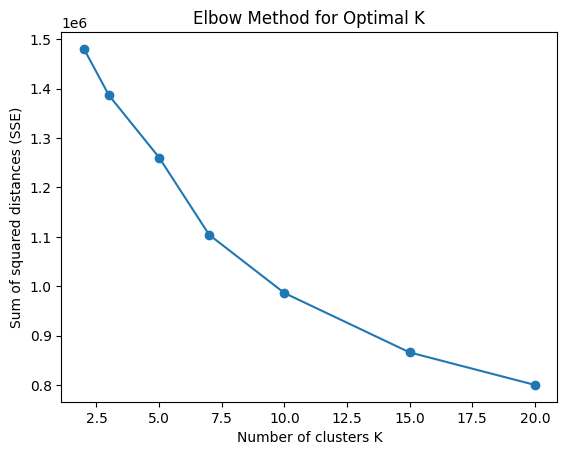

In [4]:
ks = [2, 3, 5, 7, 10, 15, 20]
kmeans_models = []
for k in ks:
	kmeans = KMeans( n_clusters = k, random_state = 42, )
	kmeans.fit( df )
	kmeans_models.append( kmeans )

sse = [ model.inertia_ for model in kmeans_models ]

print( sse )

plt.plot( ks, sse, marker = 'o' )
plt.xlabel( "Number of clusters K" )
plt.ylabel( "Sum of squared distances (SSE)" )
plt.title( "Elbow Method for Optimal K" )
plt.show()

Το αποτέλεσμα το περιμέναμε καθώς το SSL μειώνεται με περισσότερα clusters. Επιλέγω κ = 5 καθώς φαίνεται να έχει την μεγαλύτερη πτώση

In [5]:
k_optimal = 7
kmeans_optimal = KMeans( n_clusters = k_optimal )
kmeans_optimal.fit( df )
labels = kmeans_optimal.labels_
print( labels )

[2 0 0 ... 0 0 0]


In [6]:
cluster_result = []
for cluster_num in range( k_optimal ):
	col_sz = genres.shape[1]
	genre_szs = np.zeros( col_sz, dtype = np.int32 )
	mask = labels == cluster_num
	np.sum( genres[mask].to_numpy(), axis = 0, out = genre_szs )
	cluster_result.append( np.argmax( genre_szs ) )
	


print( cluster_result )
cluster_genres = genres.columns[ cluster_result ]
print( cluster_genres )

[np.int64(108), np.int64(73), np.int64(53), np.int64(18), np.int64(101), np.int64(66), np.int64(50)]
Index(['tango', 'minimal-techno', 'house', 'comedy', 'sleep', 'kids',
       'heavy-metal'],
      dtype='object')


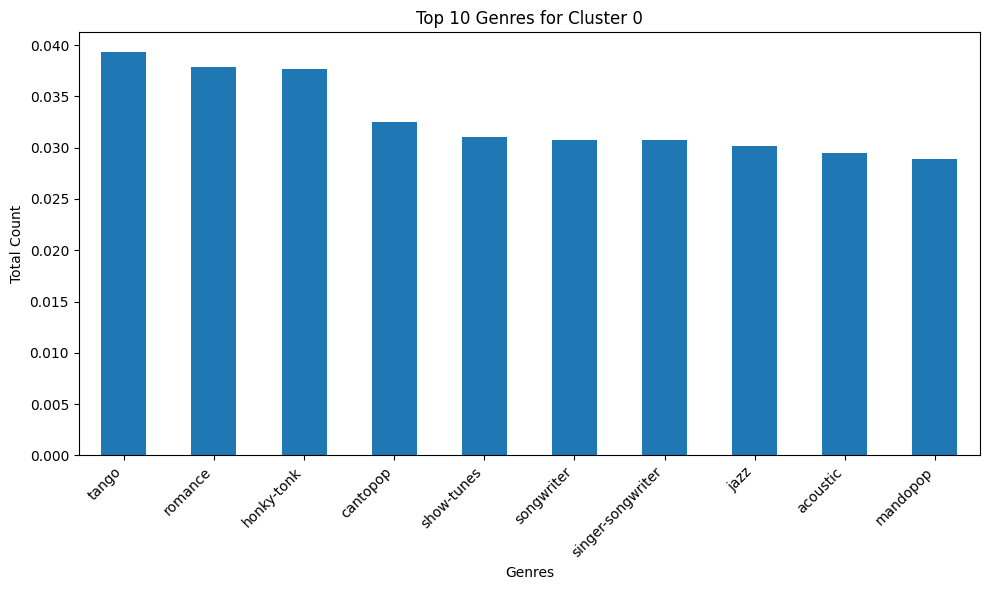

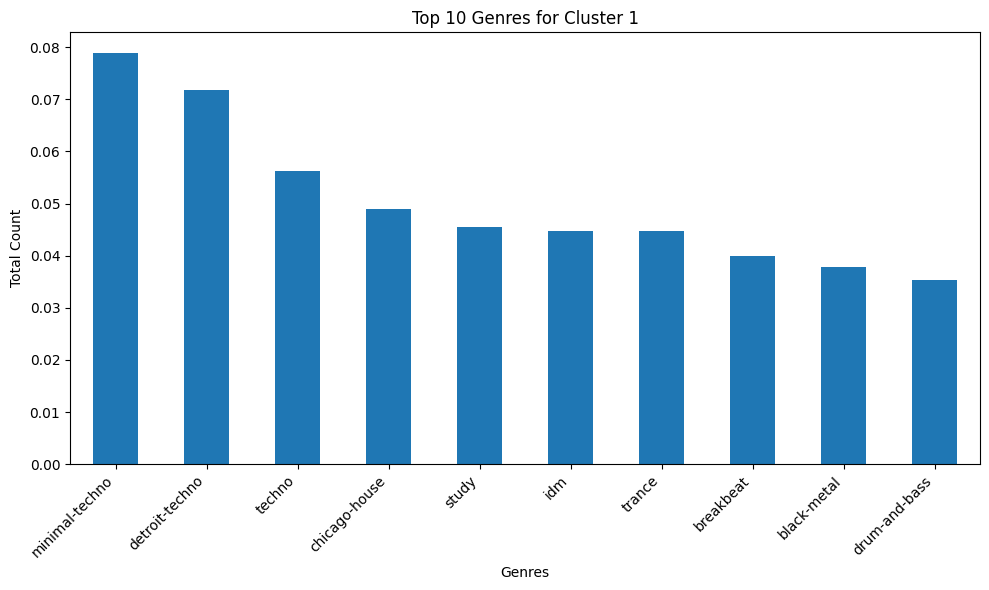

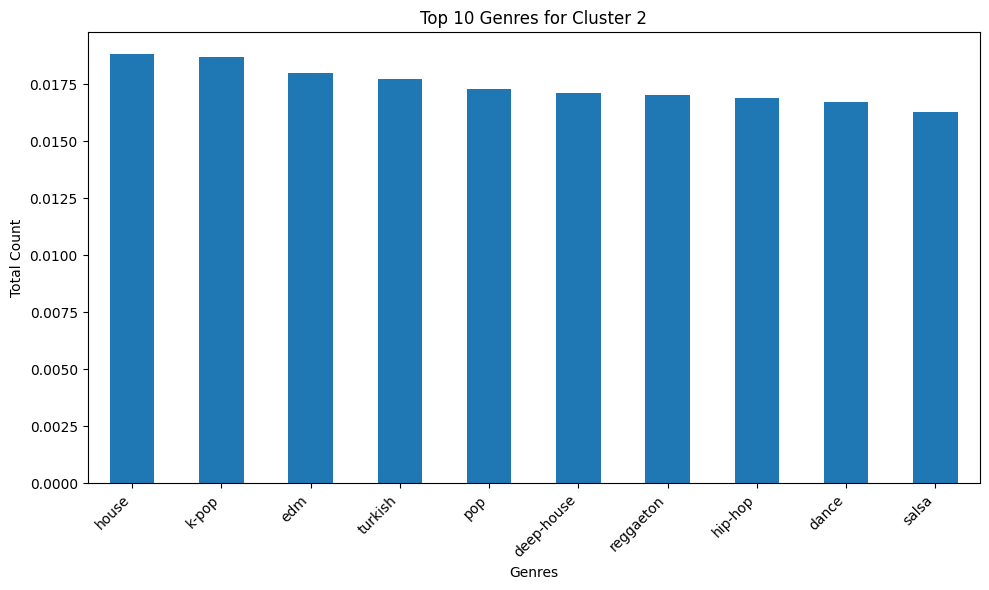

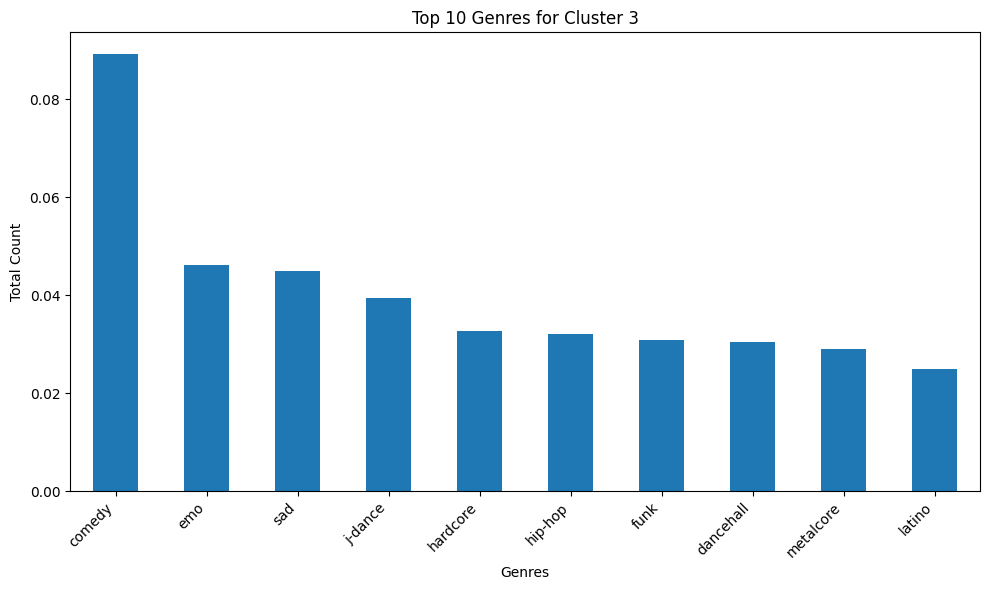

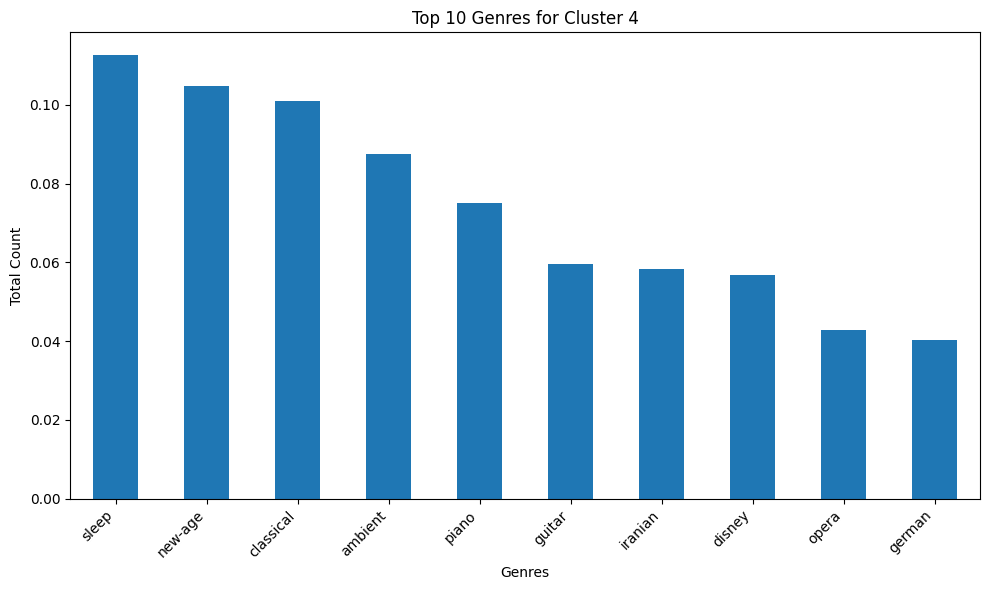

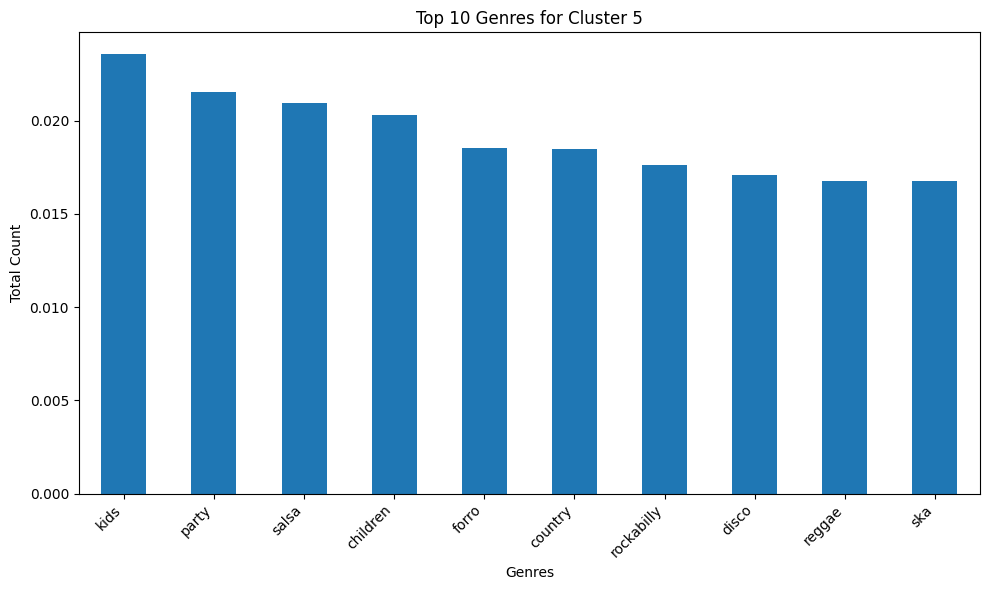

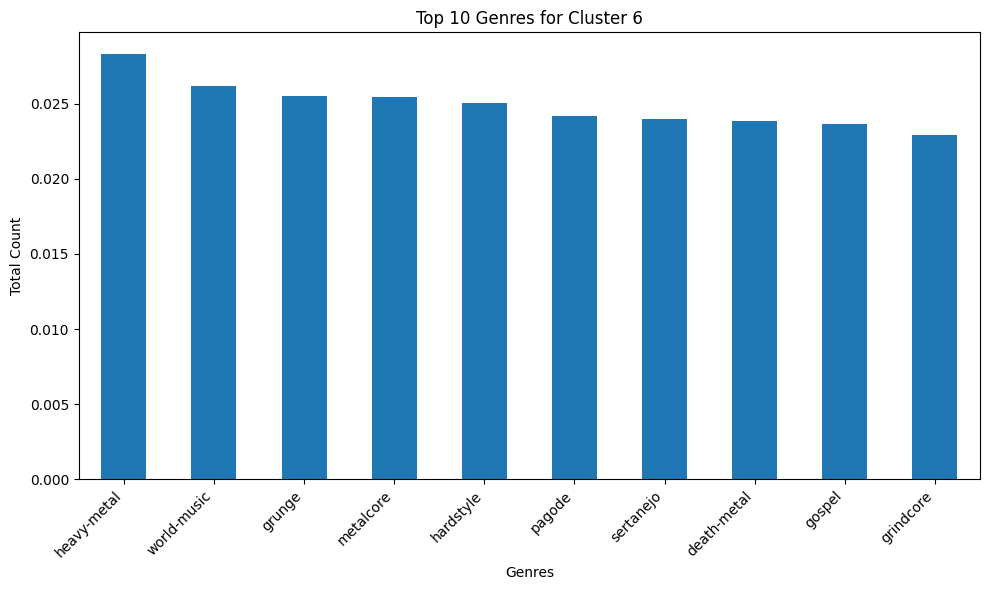

In [7]:
import matplotlib.pyplot as plt

for cluster_num in range(k_optimal):
	mask = labels == cluster_num
	cluster_genre_counts = genres[mask].sum(axis=0)/mask.sum()
	top_genres = cluster_genre_counts.sort_values(ascending=False).head(10)
	top_genres.plot(kind='bar', figsize=(10, 6))
	plt.title(f'Top 10 Genres for Cluster {cluster_num}')
	plt.xlabel('Genres')
	plt.ylabel('Total Count')
	plt.xticks(rotation=45, ha='right')
	plt.tight_layout()
	plt.show()

In [8]:
from sklearn.metrics import pairwise_distances

song = "Du hast"
song_artist = "Rammstein"

mask_song = ( track_names == song ) & ( artists == song_artist )
song_index = df[ mask_song ].index[0]

song_cluster = labels[ song_index ]

mask_cluster = labels == song_cluster
cluster_indices = df[ mask_cluster & ~mask_song ].index

recommended_songs = track_names[ mask_cluster & ~mask_song ]

distances = pairwise_distances( df.iloc[ [song_index] ], df.loc[ cluster_indices ] )

sorted_indices = np.argsort( distances[0] )
print( sorted_indices )

seen = set()
recommendations = []
for idx in sorted_indices:
	actual_idx = cluster_indices[ idx ]
	song_rec = track_names.loc[ actual_idx ]
	artist_rec = artists.loc[ actual_idx ]
	key = (song_rec, artist_rec)
	if key not in seen:
			seen.add(key)
			recommendations.append( (song_rec, artist_rec) )
			if len(recommendations) == 10:
					break

for i, (song_rec, artist_rec) in enumerate(recommendations, 1):
	print( f"{i}. song: {song_rec} artist: {artist_rec}" )

[16555 16787  8916 ...  7970  8003 11168]
1. song: Heads Will Roll artist: Yeah Yeah Yeahs
2. song: Ain't Talkin' 'Bout Love - 2015 Remaster artist: Van Halen
3. song: Voyage voyage artist: Desireless
4. song: Immortals artist: Fall Out Boy
5. song: The Heart from Your Hate artist: Trivium
6. song: You're in Love with a Psycho artist: Kasabian
7. song: Money Run Low artist: The Score
8. song: ピースサイン artist: Kenshi Yonezu
9. song: No Money artist: Galantis
10. song: Dance Macabre artist: Ghost


Επιλέχθηκε το Du hast των Rammstein και οι επιλογές που δίνει είναι όντως λογικές

In [9]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity


song = "Du hast"
song_artist = "Rammstein"

mask_song = ( track_names == song ) & ( artists == song_artist )
song_index = df[ mask_song ].index[0]

song_cluster = labels[ song_index ]

mask_cluster = labels == song_cluster
cluster_indices = df[ mask_cluster & ~mask_song ].index

recommended_songs = track_names[ mask_cluster & ~mask_song ]

similarities = cosine_similarity( df.iloc[ [song_index] ], df.loc[ cluster_indices ] )

sorted_indices = np.argsort( similarities[0] )[::-1]
print( sorted_indices )

seen = set()
recommendations = []
for idx in sorted_indices:
	actual_idx = cluster_indices[ idx ]
	song_rec = track_names.loc[ actual_idx ]
	artist_rec = artists.loc[ actual_idx ]
	key = (song_rec, artist_rec)
	if key not in seen:
			seen.add(key)
			recommendations.append( (song_rec, artist_rec) )
			if len(recommendations) == 10:
					break

for i, (song_rec, artist_rec) in enumerate(recommendations, 1):
	print( f"{i}. song: {song_rec} artist: {artist_rec}" )

[16555 16787  8916 ... 17981 12975 19785]
1. song: Heads Will Roll artist: Yeah Yeah Yeahs
2. song: Ain't Talkin' 'Bout Love - 2015 Remaster artist: Van Halen
3. song: Voyage voyage artist: Desireless
4. song: Immortals artist: Fall Out Boy
5. song: Boy With Luv (feat. Halsey) artist: BTS;Halsey
6. song: Beggin' artist: Måneskin
7. song: ピースサイン artist: Kenshi Yonezu
8. song: The Heart from Your Hate artist: Trivium
9. song: Smooth Criminal artist: Alien Ant Farm
10. song: DALLA DALLA artist: ITZY


 Το recomendation δίνει παρόμοια αποτελέσματα και αυτό γιατί λογικά είναι normalized.

In [10]:
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN( eps = 3, min_samples = 5, n_jobs = -1 )
dbscan_model.fit( df )
labels_dbscan = dbscan_model.labels_

In [12]:
from sklearn.metrics import pairwise_distances
print( np.unique( labels_dbscan ) )
song = "Du hast"
song_artist = "Rammstein"

mask_song = ( track_names == song ) & ( artists == song_artist )
song_index = df[ mask_song ].index[0]

song_cluster = labels_dbscan[ song_index ]

mask_cluster = labels_dbscan == song_cluster
cluster_indices = df[ mask_cluster & ~mask_song ].index

recommended_songs = track_names[ mask_cluster & ~mask_song ]

distances = pairwise_distances( df.iloc[ [song_index] ], df.loc[ cluster_indices ] )

sorted_indices = np.argsort( distances[0] )
print( sorted_indices )

seen = set()
recommendations = []
for idx in sorted_indices:
	actual_idx = cluster_indices[ idx ]
	song_rec = track_names.loc[ actual_idx ]
	artist_rec = artists.loc[ actual_idx ]
	key = (song_rec, artist_rec)
	if key not in seen:
			seen.add(key)
			recommendations.append( (song_rec, artist_rec) )
			if len(recommendations) == 10:
					break

for i, (song_rec, artist_rec) in enumerate(recommendations, 1):
	print( f"{i}. song: {song_rec} artist: {artist_rec}" )

[-1  0  1  2  3  4  5  6  7  8  9 10 11]
[76526 77625 42531 ... 15241 15307 15252]
1. song: Heads Will Roll artist: Yeah Yeah Yeahs
2. song: Ain't Talkin' 'Bout Love - 2015 Remaster artist: Van Halen
3. song: Voyage voyage artist: Desireless
4. song: Immortals artist: Fall Out Boy
5. song: The Heart from Your Hate artist: Trivium
6. song: You're in Love with a Psycho artist: Kasabian
7. song: Money Run Low artist: The Score
8. song: ピースサイン artist: Kenshi Yonezu
9. song: No Money artist: Galantis
10. song: Dance Macabre artist: Ghost
